In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from multihist import Histdd

import flamedisx as fd

import os

import sys
#sys.path.append('../../../xlzd_reqtask_nufog/fogtask')
sys.path.append('/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/fogtask')
from fogtask import get_parameters
import fogtask

2025-07-14 14:30:02.228806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752528602.246215 1347044 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752528602.251340 1347044 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752528602.266784 1347044 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752528602.266805 1347044 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752528602.266807 1347044 computation_placer.cc:177] computation placer alr

In [2]:
fogtask.generate_templates(mode='LENR', signal_type='WIMP')

/global/homes/r/rory_m/.conda/envs/flamedisx_tester/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rory_m/.conda/envs/flamedisx_tester/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rory_m/.conda/envs/flamedisx_tester/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/global/homes/r/rory_m/.conda/envs/flamedisx_tester/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")
/glo

SolarER: 11.729004859924315
Pb214: 2.2649402618408203
Kr85: 10.324360847473145
Xe136: 3.8469991683959965
Xe124: 1.1582109928131106
CEvNS_solar: 1.1737858057022095
CEvNS_other_LNGS: 0.046197693794965744
CEvNS_other_SURF: 0.0637216791510582
neutrons_LNGS: 0.004619769379496575
WIMP10: 20.02750688824415
WIMP: 0.14777564036313945


In [ ]:
#fogtask.generate_all_wimp_templates(use_radius=True)

AttributeError: module 'fogtask' has no attribute 'generate_all_wimp_templates'

In [ ]:
pdfs = [dict(), dict()]

In [ ]:
parameters = get_parameters()

## Analysis (and template) parameters

In [ ]:
cS1_min = parameters['wimp_analysis_parameters']['cs1_range']['value'][0]
cS1_max = parameters['wimp_analysis_parameters']['cs1_range']['value'][-1]
log10_cS2_min = parameters['wimp_analysis_parameters']['cs2_range']['value'][0]
log10_cS2_max = parameters['wimp_analysis_parameters']['cs2_range']['value'][-1]

s2_thr = parameters['wimp_analysis_parameters']['s2_threshold']['value']
coin_level = parameters['wimp_analysis_parameters']['coincidence_threshold']['value']

## Detector parameters

In [ ]:
drift_field_V_cm = parameters['parameters']['drift_field']['value']
gas_field_kV_cm = parameters['parameters']['gas_field']['value']
elife_ns = parameters['parameters']['electron_livetime']['value'] * 1e6
g1 = parameters['parameters']['PMT_quantum_efficiency']['value']
temperature_K = parameters['parameters']['temperature']['value']
pressure_bar = parameters['parameters']['pressure']['value']
num_pmts = parameters['parameters']['n_pmts']['value']
double_pe_fraction = parameters['parameters']['p_dpe']['value']
g1_gas = parameters['parameters']['g1_gas']['value']
s2Fano = parameters['parameters']['s2_fano']['value']
spe_res = parameters['parameters']['spe_resolution']['value']
spe_thr = parameters['parameters']['spe_threshold']['value']
spe_eff = parameters['parameters']['spe_efficiency']['value']

## Background levels

In [ ]:
Pb214_activity_mBq_kg = parameters['background_rates']['Pb214']['value']
Kr85_activity_ppt = parameters['background_rates']['Kr85']['value']
neutrons_relative_to_vER = parameters['background_rates']['neutron']['value']

## Background sources

In [ ]:
SolarER = fd.xlzd.XLZDvERSource(configuration='60t',
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                                temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                                g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                                cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                                s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


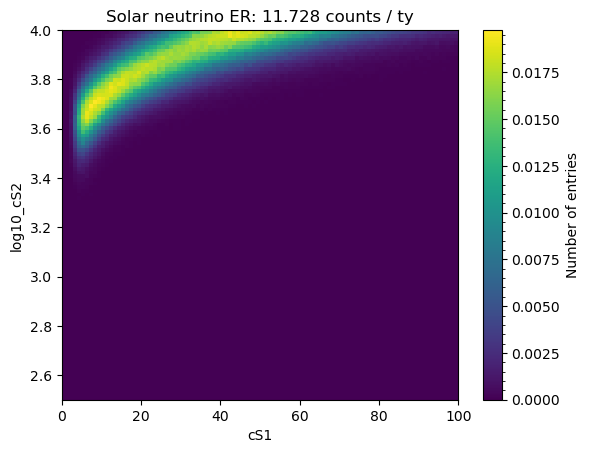

In [ ]:
SolarER_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

SolarER_data = SolarER.simulate(int(1e7))

SolarER_hist.add(SolarER_data['cs1'], np.log10(SolarER_data['cs2']))

SolarER_mu = SolarER.estimate_mu(n_trials=int(1e7))
SolarER_hist.histogram = SolarER_hist.histogram / SolarER_hist.n * SolarER_mu

SolarER_hist.plot()
plt.title(f'Solar neutrino ER: {SolarER_mu:.3f} counts / ty')

pdfs[0]['SolarER'] = SolarER_hist

In [ ]:
Pb214 = fd.xlzd.XLZDPb214Source(configuration='60t',
                                activity_mBq_kg=Pb214_activity_mBq_kg,
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                                temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                                g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                                cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                                s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


0.1344261


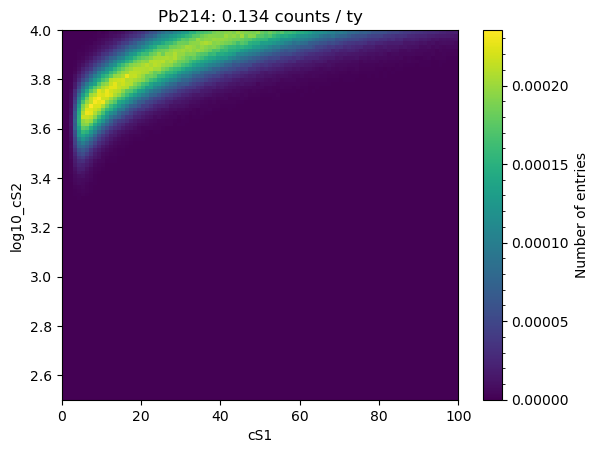

In [ ]:
Pb214_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Pb214_data = Pb214.simulate(int(1e7))

Pb214_hist.add(Pb214_data['cs1'], np.log10(Pb214_data['cs2']))

Pb214_mu = Pb214.estimate_mu(n_trials=int(1e7))

print(Pb214_mu)
Pb214_hist.histogram = Pb214_hist.histogram / Pb214_hist.n * Pb214_mu

Pb214_hist.plot()
plt.title(f'Pb214: {Pb214_mu:.3f} counts / ty')

pdfs[0]['Pb214'] = Pb214_hist

In [ ]:
Kr85 = fd.xlzd.XLZDKr85Source(configuration='60t',
                              activity_ppt=Kr85_activity_ppt,
                              drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                              temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                              g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                              cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                              s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


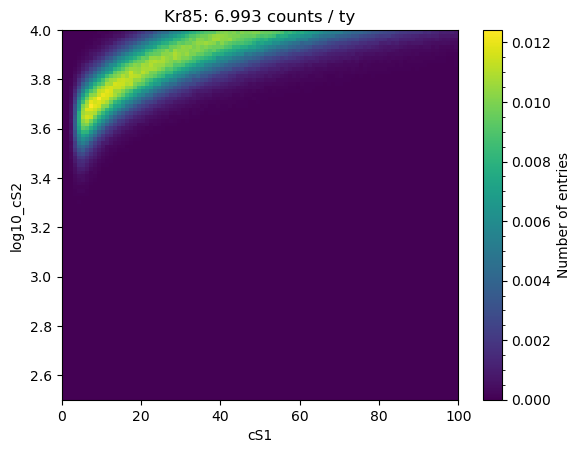

In [ ]:
Kr85_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Kr85_data = Kr85.simulate(int(1e7))

Kr85_hist.add(Kr85_data['cs1'], np.log10(Kr85_data['cs2']))

Kr85_mu = Kr85.estimate_mu(n_trials=int(1e7))
Kr85_hist.histogram = Kr85_hist.histogram / Kr85_hist.n * Kr85_mu

Kr85_hist.plot()
plt.title(f'Kr85: {Kr85_mu:.3f} counts / ty')

pdfs[0]['Kr85'] = Kr85_hist

In [ ]:
Xe136 = fd.xlzd.XLZDXe136Source(configuration='60t',
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                                temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                                g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                                cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                                s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


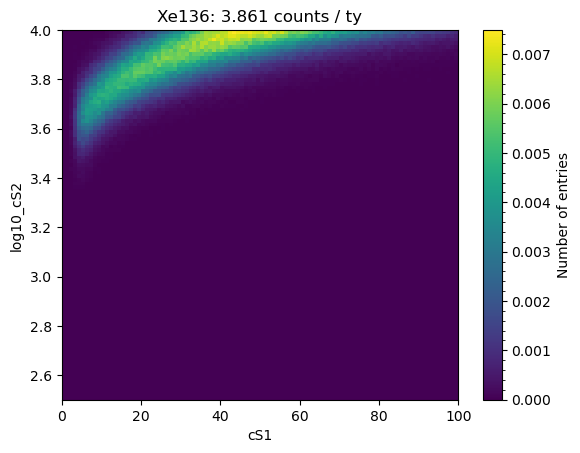

In [ ]:
Xe136_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Xe136_data = Xe136.simulate(int(1e7))

Xe136_hist.add(Xe136_data['cs1'], np.log10(Xe136_data['cs2']))

Xe136_mu = Xe136.estimate_mu(n_trials=int(1e7))
Xe136_hist.histogram = Xe136_hist.histogram / Xe136_hist.n * Xe136_mu

Xe136_hist.plot()
plt.title(f'Xe136: {Xe136_mu:.3f} counts / ty')

pdfs[0]['Xe136'] = Xe136_hist

In [ ]:
Xe124 = fd.xlzd.XLZDXe124Source(configuration='60t',
                                drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                                temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                                g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                                cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                                s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


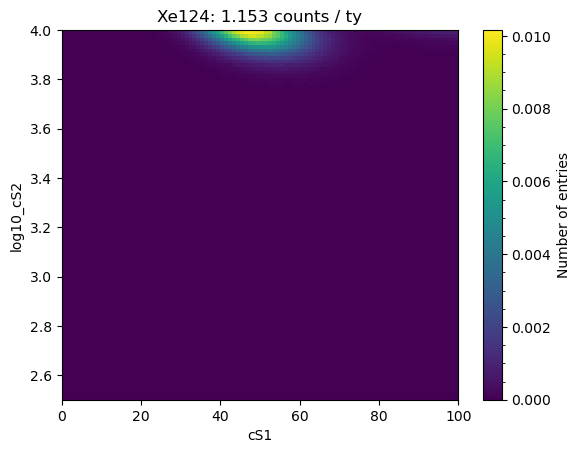

In [ ]:
Xe124_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Xe124_data = Xe124.simulate(int(1e7))

Xe124_hist.add(Xe124_data['cs1'], np.log10(Xe124_data['cs2']))

Xe124_mu = Xe124.estimate_mu(n_trials=int(1e7))
Xe124_hist.histogram = Xe124_hist.histogram / Xe124_hist.n * Xe124_mu

Xe124_hist.plot()
plt.title(f'Xe124: {Xe124_mu:.3f} counts / ty')

pdfs[0]['Xe124'] = Xe124_hist

In [ ]:
CEvNS_other_LNGS = fd.xlzd.XLZDvNROtherLNGSSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                                                  temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                                                  g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                                                  cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                                                  s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


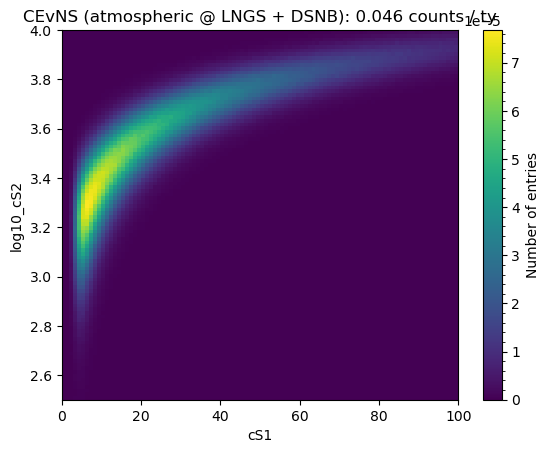

In [ ]:
CEvNS_other_LNGS_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_other_LNGS_data = CEvNS_other_LNGS.simulate(int(1e7))

CEvNS_other_LNGS_hist.add(CEvNS_other_LNGS_data['cs1'], np.log10(CEvNS_other_LNGS_data['cs2']))

CEvNS_other_LNGS_mu = CEvNS_other_LNGS.estimate_mu(n_trials=int(1e7))
CEvNS_other_LNGS_hist.histogram = CEvNS_other_LNGS_hist.histogram / CEvNS_other_LNGS_hist.n * CEvNS_other_LNGS_mu

CEvNS_other_LNGS_hist.plot()
plt.title(f'CEvNS (atmospheric @ LNGS + DSNB): {CEvNS_other_LNGS_mu:.3f} counts / ty')

pdfs[0]['CEvNS_other_LNGS'] = CEvNS_other_LNGS_hist

In [ ]:
neutrons = fd.xlzd.XLZDWIMPSource(wimp_mass=46,
                                  configuration='60t',
                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                                  temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                                  g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                                  cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                                  s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


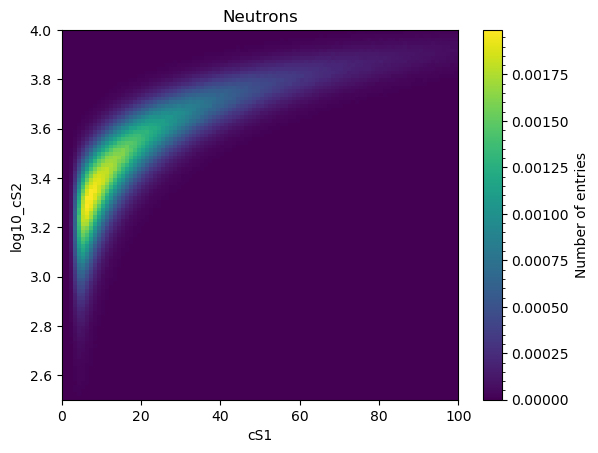

In [ ]:
neutrons_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

neutrons_data = neutrons.simulate(int(1e7))

neutrons_hist.add(neutrons_data['cs1'], np.log10(neutrons_data['cs2']))

neutrons_hist.histogram = neutrons_hist.histogram / neutrons_hist.n

neutrons_hist.plot()
plt.title(f'Neutrons')

pdfs[0]['neutrons'] = neutrons_hist * (CEvNS_other_LNGS_mu * neutrons_relative_to_vER)

In [ ]:
CEvNS_solar = fd.xlzd.XLZDvNRSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                                                  temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                                                  g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                                                  cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                                                  s2_thr=s2_thr, coin_level=coin_level)

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


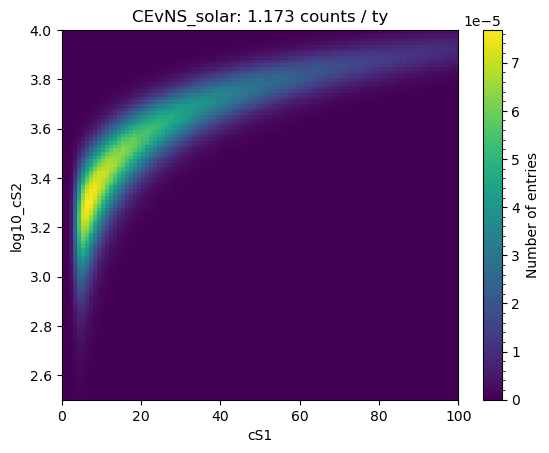

In [ ]:
CEvNS_solar_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_solar_data = CEvNS_solar.simulate(int(1e7))

CEvNS_solar_hist.add(CEvNS_solar_data['cs1'], np.log10(CEvNS_solar_data['cs2']))


CEvNS_solar_mu = CEvNS_solar.estimate_mu(n_trials=int(1e7))
CEvNS_solar_hist.histogram = CEvNS_solar_hist.histogram / CEvNS_solar_hist.n * CEvNS_solar_mu

CEvNS_other_LNGS_hist.plot()
plt.title(f'CEvNS_solar: {CEvNS_solar_mu:.3f} counts / ty')

pdfs[0]['CEvNS_solar'] = CEvNS_solar_hist

## Signal sources

In [ ]:
mass_template = 5000.0
#mass_template = 1000.0
cross_sec_template = 1e-45

mass_benchmark = 2827.
cross_sec_benchmark = 2.05e-47

/global/homes/r/rory_m/.conda/envs/flamedisx/lib/python3.11/site-packages/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


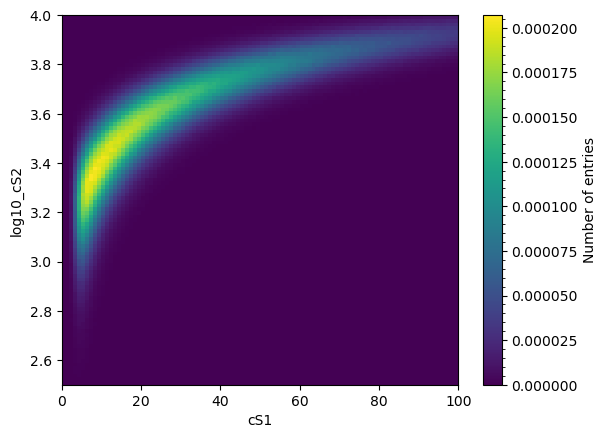

In [ ]:
WIMP = fd.xlzd.XLZDWIMPSource(wimp_mass=mass_template, configuration='60t',
                              drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm, elife_ns=elife_ns, g1=g1,
                              temperature_K=temperature_K, pressure_bar=pressure_bar, num_pmts=num_pmts, double_pe_fraction=double_pe_fraction,
                              g1_gas=g1_gas, s2Fano=s2Fano, spe_res=spe_res, spe_thr=spe_thr, spe_eff=spe_eff,
                              cS1_min=cS1_min, cS1_max=cS1_max, log10_cS2_min=log10_cS2_min, log10_cS2_max=log10_cS2_max,
                              s2_thr=s2_thr, coin_level=coin_level)

WIMP_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

WIMP_data = WIMP.simulate(int(1e7))

WIMP_hist.add(WIMP_data['cs1'], np.log10(WIMP_data['cs2']))

WIMP_mu = WIMP.estimate_mu(n_trials=int(1e7))
WIMP_mu *= (mass_template / mass_benchmark)
WIMP_mu *= (cross_sec_benchmark / cross_sec_template)
WIMP_hist.histogram = WIMP_hist.histogram / WIMP_hist.n * WIMP_mu

plt.figure()
WIMP_hist.plot()

pdfs[1]['WIMP5000'] = WIMP_hist

## Save all PDFs

In [ ]:
if not os.path.exists('PDFs'):
    os.makedirs('PDFs')

In [ ]:
pkl.dump(pdfs, open(f'PDFs/pdfs_WIMP_disco_60t_benchmark.pkl', 'wb'))